# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data
PROJECT_HOME = '/home/carnd/CarND-Traffic-Sign-Classifier-Project'

training_file = os.path.join(PROJECT_HOME, 'train.p')
testing_file = os.path.join(PROJECT_HOME, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


In [2]:
# Load sign names file in dict for debugging
signs_dict = dict()
with open(os.path.join(PROJECT_HOME, 'signnames.csv')) as f:
    for line in f:
        key, name = line.strip().split(',')
        try:
            signs_dict[int(key)] = name
        except ValueError:
            pass


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:

def print_stats(train, test):
    print('Nbr. of train labels:', len(train['labels']))
    print('Nbr. of train features:', len(train['features']))
    print('Nbr. of test labels:', len(test['labels']))
    print('Nbr. of test features:', len(test['features']))
    print('Shape of each train image:', train['features'][3].shape)
    print('Nbr. of distinct labels', len(set(train['labels']).union(set(test['labels']))))

In [4]:
print_stats(train, test)

Nbr. of train labels: 39209
Nbr. of train features: 39209
Nbr. of test labels: 12630
Nbr. of test features: 12630
Shape of each train image: (32, 32, 3)
Nbr. of distinct labels 43


In [5]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = 39209

# Number of testing examples.
n_test = 12630

# What's the shape of an traffic sign image?
image_shape = (32, 32, 3)

# How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Priority road


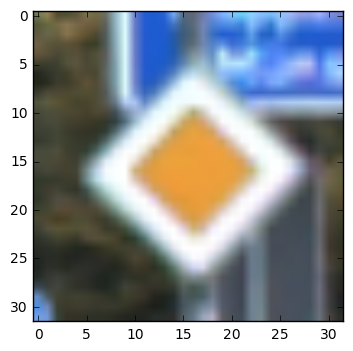

Speed limit (120km/h)


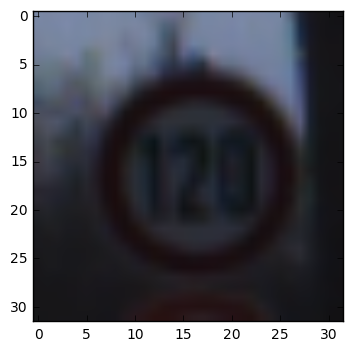

Traffic signals


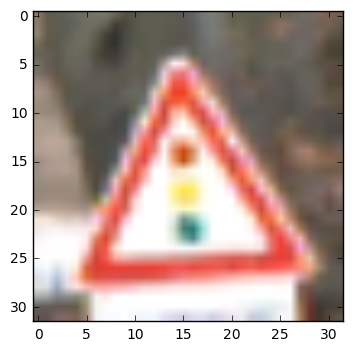

No vechiles


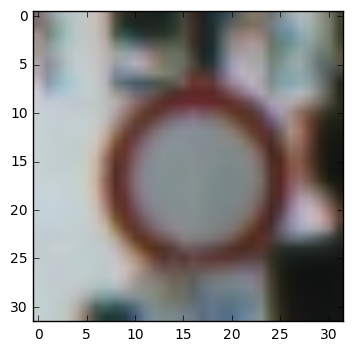

Right-of-way at the next intersection


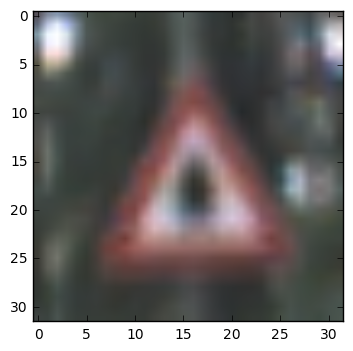

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np
# show 5 random training images
for img_n in np.random.choice(range(0, len(train['features'])), 5):
    print(signs_dict[train['labels'][img_n]])
    plt.imshow(train['features'][img_n])
    plt.show()

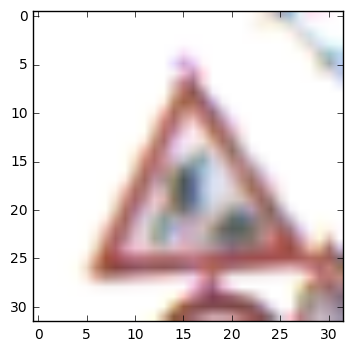

In [7]:
# print example of specifc sign
for img_n in np.random.permutation(range(0, len(train['features']))):
    if train['labels'][img_n] == 25:
        plt.imshow(train['features'][img_n])
        plt.show()
        break

In [8]:
# plot sign frequencies in histogram
from collections import defaultdict
def sign_frqs(labels):
    frq_dict = defaultdict(int)
    for l in labels:
        frq_dict[l] += 1
    plt.bar(list(frq_dict.keys()), list(frq_dict.values()))

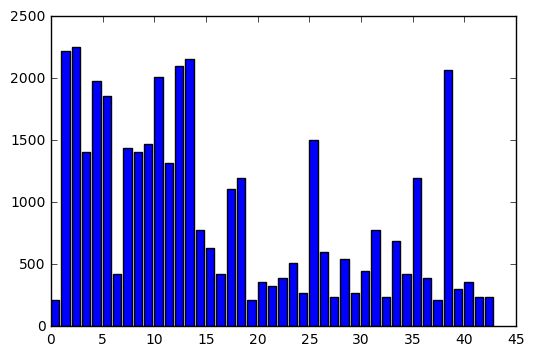

In [9]:
# frequency of each sign in training data
sign_frqs(train['labels'])

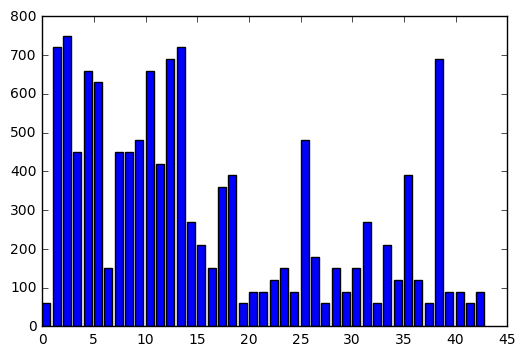

In [10]:
# frequency of each sign in test data
sign_frqs(test['labels'])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
import tensorflow as tf
import numpy as np
import cv2

### Preprocess the data here.
### Feel free to use as many code cells as needed.
def preprocess(x):
    # input is single image x as 32x32x3 matrix
    # convert to grayscale
    #x = np.array([cv2.cvtColor(y, cv2.COLOR_BGR2GRAY) for y in x])
    # normalize
    x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
    return x

PRE_PRO_NAME = 'norm'

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I initially started my experiments with un-preprocessed input and then ran a few test with converting to gray scale and normalizing.  The test results for using normalizing were simply better than the unprocessed image, using gray-scale, or using both.  The differences were not large though.

I can imagine that the normalization pre-processing techinque helps due to the very strong variation in the light conditions of the pictures.  I.e. some pictures are taken during bright daylight, others in very dark cricumstances.

My intuition on conversion to gray-scale was sceptical since the color of a signs matters.  It seemed not to have a negative effect though.


In [12]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

N = n_train         # Total number of traning and validation examples.  Set to n_train in final model training
V = int(N/10.0)     # Number of validation examples

# Choose N random indices
rand_indices = np.random.choice(range(len(train['features'])), N)

# selet first N-V rand_indeces from train to train, and select last V to validate
train_features = np.take(X_train, rand_indices[:N-V], axis=0)
train_labels = np.take(y_train, rand_indices[:N-V], axis=0)
validate_features = np.take(X_train, rand_indices[N-V:N], axis=0)
vaildate_labels = np.take(y_train, rand_indices[N-V:N], axis=0)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I noticed that the training data set is very large and "sorted".  I.e. there are multiple pictures of each sign right after each other.  I assumed such a sorting can be misleading for the training so I implemented a way to choose N random training examples of which V are used for validation (the rest for training).

For the final model training I set N to the total size of the training set.

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def tsc(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    x = tf.reshape(x, (-1, 32, 32, 3))

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x24. Output = 600.
    fc0   = flatten(conv2)

    # Layer 3: Fully Connected. Input = 600. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 240. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 120. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I started with the LeNet architecture and tried to improve it for the given task.  All my changes lead to either worse model performance or minimal improvements. My final version is an architecture very similar to LeNet.  I use slightly more nodes at each level then LeNet does.

The model is a convolutional neural network with the following architecture:
  - Input is a batch of 32x32x3 sized images
  - Convolution layer with filter of size 5x5x3 (stride=1 in all dim) and output depth of 12.  So total output is 28x28x12.
  - ReLU (Rectified Linear Unit) for activation
  - Pooling layer to reduce width and height to 14x14
  - Convolution layer with filter size 5x5x12 (stride=1 in all dim) and output depth of 24.  Total output is 10x10x24
  - ReLU for activation
  - Pooling layer to reduce width and height to 5x5
  - The output of the pooling is flattened (5x5x24 to 600) to simplify input to fully connected layer
  - Fully connected layer  600 to 240
  - ReLU for activation
  - Fully connected layer  240 to 120
  - ReLU for activation
  - Fully connected layer  120 to 43
  


In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Each image is 32x32x3
# preprocessing keeps dimension 32x32x3
# and the number of classes in the label set is 43.
x = tf.placeholder("float", [None, 32, 32, 3])
y = tf.placeholder(tf.float32, (None, 43))

# training pipeline (like LeNet)
logits = tsc(x)
loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.AdamOptimizer()
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
# model evaluation (like LeNet)
def evaluate(features, labels):
    steps_per_epoch = len(features) // BATCH_SIZE   
    num_examples = steps_per_epoch * BATCH_SIZE
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    for step in range(steps_per_epoch):
        batch_x = preprocess(features[step*BATCH_SIZE : (step+1)*BATCH_SIZE])
        batch_y = tf.one_hot(labels[step*BATCH_SIZE : (step+1)*BATCH_SIZE], 43).eval()
        loss, accuracy =  sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * batch_x.shape[0])
        total_loss     += (loss * batch_x.shape[0])
    return total_loss / num_examples, total_accuracy / num_examples

In [16]:
# Constants
EPOCHS = 6
BATCH_SIZE = 100

In [17]:
# actual training (like LeNet)
num_batches = len(train_features) // BATCH_SIZE
num_examples = num_batches * BATCH_SIZE

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for batch in range(num_batches):
            batch_x = preprocess(train_features[batch*BATCH_SIZE : (batch+1)*BATCH_SIZE])           # preprocess
            batch_y = tf.one_hot(train_labels[batch*BATCH_SIZE : (batch+1)*BATCH_SIZE], 43).eval()  # one hot encode
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_loss, validation_accuracy = evaluate(validate_features, vaildate_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation Loss     = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver = tf.train.Saver()
    saver.save(sess, 'tsc.%s.%s.%s.%s' % (N, EPOCHS, BATCH_SIZE, PRE_PRO_NAME))
    print("Model saved")

Training...

EPOCH 1 ...
Validation Loss     = 0.339
Validation Accuracy = 0.899

EPOCH 2 ...
Validation Loss     = 0.186
Validation Accuracy = 0.946

EPOCH 3 ...
Validation Loss     = 0.163
Validation Accuracy = 0.956

EPOCH 4 ...
Validation Loss     = 0.130
Validation Accuracy = 0.968

EPOCH 5 ...
Validation Loss     = 0.109
Validation Accuracy = 0.974

EPOCH 6 ...
Validation Loss     = 0.109
Validation Accuracy = 0.975

Model saved


In [18]:
# model validation (like LeNet)
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('tsc.%s.%s.%s.%s.meta' % (N, EPOCHS, BATCH_SIZE, PRE_PRO_NAME))
    loader.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss, test_accuracy = evaluate(test['features'], test['labels'])
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Loss     = 0.636
Test Accuracy = 0.894


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

My starting point was the LeNet solution and I experimented (without a deeper startegy) by manipulating each parameter a bit.  Here are some observations and comments.

Epochs:  I started with EPOCH=10 but noticed that the validation accuracy did not improve anymore after epoch 6.
Batch size:  I noticed that larger batch sizes speed up the model training, but lower ones are better for accuracy.  After experimenting a bit I chose 100.
Optimizer:  I use the Adam optimizer just like the LeNet solution.
Hyperparameters:  Again I changed the parameters a bit during my tests, but no choice led to a significant improvement of the original.  So my final solution has mu=0 and sigma=0.1.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I first tried to take the LeNet solution from the lecture and adapt it such that it can handle the input from our dataset.  My plan was to play with the many parameters and see if I can improve the model bit by bit.

In my first tests I noticed that the model training took very long (hours) so I looked a bit more into splitting the training data into smaller sets and randomizing the selection of training input.

After some successes with reduced training data I played a bit with the preprocessing and noticed that a normalization of the input improved the test results.  I also tested a conversion to gray-scale but this did not lead to any improvements.

Since the input depth of our data is 3 (since the images are in color) and LeNet had 1, I had the idea that adding some depth in the remaining layers of the network might improve my results.  So my final architecture looks pretty much like LeNet only with more nodes.  I noticed a tiny improvement in the test accuracy.  The model training takes a good amount longer though.  Probably the small improvement does not justify the longer training time.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

/home/carnd/CarND-Traffic-Sign-Classifier-Project/extra_img/01.jpg


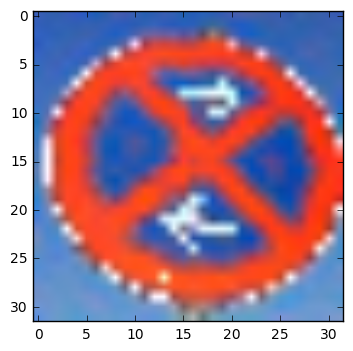

/home/carnd/CarND-Traffic-Sign-Classifier-Project/extra_img/02.jpg


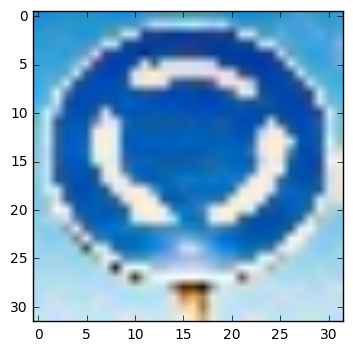

/home/carnd/CarND-Traffic-Sign-Classifier-Project/extra_img/03.jpg


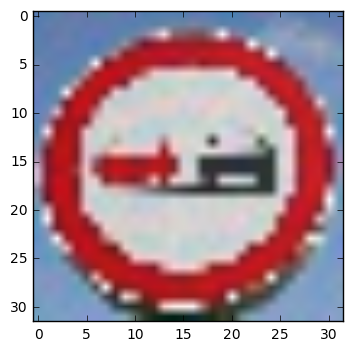

/home/carnd/CarND-Traffic-Sign-Classifier-Project/extra_img/04.jpg


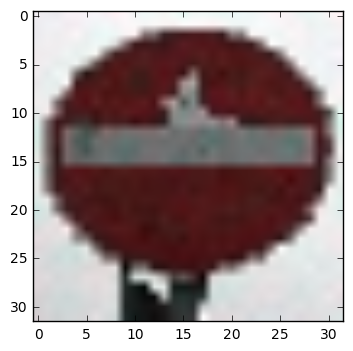

/home/carnd/CarND-Traffic-Sign-Classifier-Project/extra_img/05.jpg


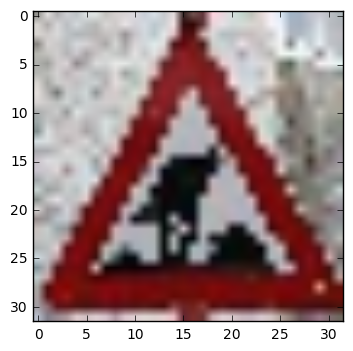

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import glob
EXTRA_IMG_HOME = '/home/carnd/CarND-Traffic-Sign-Classifier-Project/extra_img'
PICTURES = sorted(glob.glob(os.path.join(EXTRA_IMG_HOME, '*.jpg')))
for jpgFile in PICTURES:
    print(jpgFile)
    img = cv2.imread(jpgFile)
    plt.imshow(img)
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I looked for German traffic signs on the web to give the classifier a good chance.  I also tried to make sure that the images were clear images of the given sign without distracting background, bad light, etc.

All images were scaled down to 32x32.

Pictures 2 and 3 should be recognized with high certainty.  The pictures are clear and the signs are contained in the dataset.

Pictures 4 and 5 are slightly "modified", i.e. someone has drawn small additions on the sign.  I would still expect the classifier to recognize the signs since the modifications are relatively small.

Picture 1 is a "No Parking" sign which is a common German sign but which is not contained in the training data.  It resembles a bit the roundabout sign so I was wondering what the classifier would return for this input.

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def classify_signs(picture_list):
    preprocessed_input = preprocess(picture_list)
    res = sess.run(tf.argmax(logits, 1), feed_dict={x: preprocessed_input})
    print(res)
    for r in res:
        print(signs_dict[r])

input_list = [cv2.imread(jpgFile) for jpgFile in PICTURES]

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('tsc.%s.%s.%s.%s.meta' % (N, EPOCHS, BATCH_SIZE, PRE_PRO_NAME))
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    classify_signs(input_list)

[ 4 40  9  9 25]
Speed limit (70km/h)
Roundabout mandatory
No passing
No passing
Road work


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The correct classification would be:

 -      (not applicable since sign not in dataset)
 - 40:   Roundabout mandatory
 - 9:    No passing
 - 17:   No entry
 - 25:   Road work
 
Instead we got:

 - 4: Speed limit (70 km/h) --> N/A
 - 40: Roundabout mandatory --> True
 - 9: No Passing --> True
 - 9: No Passing  --> False
 - 25: Road work --> True
 
So from the 4 recognizable signs 3 were correct which means an accuracy of 75%.  This is a bit worse than the ~89% we had in the model test.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def top_classify_signs(picture_list, topN=3):
    preprocessed_input = preprocess(picture_list)
    res = sess.run(tf.nn.top_k(tf.nn.softmax(logits), topN), feed_dict={x: preprocessed_input})
    #print(res)
    print('Top Values; ', 'Top Indices;', 'Sign names;')
    for n, r in enumerate(res.indices):
        print(res.values[n], r, [signs_dict[i] for i in r])

input_list = [cv2.imread(jpgFile) for jpgFile in PICTURES]

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('tsc.%s.%s.%s.%s.meta' % (N, EPOCHS, BATCH_SIZE, PRE_PRO_NAME))
    loader.restore(sess, tf.train.latest_checkpoint('.'))
    top_classify_signs(input_list)

Top Values;  Top Indices; Sign names;
[  9.96552110e-01   3.09123984e-03   3.23276879e-04] [ 4 25 12] ['Speed limit (70km/h)', 'Road work', 'Priority road']
[  9.74647880e-01   2.51367483e-02   2.13912004e-04] [40  2 37] ['Roundabout mandatory', 'Speed limit (50km/h)', 'Go straight or left']
[  9.39671993e-01   6.01632893e-02   1.64660451e-04] [ 9 41 10] ['No passing', 'End of no passing', 'No passing for vechiles over 3.5 metric tons']
[  9.99647975e-01   3.47213208e-04   4.72243164e-06] [ 9 13 10] ['No passing', 'Yield', 'No passing for vechiles over 3.5 metric tons']
[ 0.40928146  0.37677816  0.21373466] [25 28 11] ['Road work', 'Children crossing', 'Right-of-way at the next intersection']


**Answer:**

The first picture was not in the dataset.  The top probability is very high. Ideally the model would have shown uncertainty here (bad).

The second sign was recognized correctly and the probability is high (good)

The third sign was recognized correctly and the probability is high (good)

The forth sign was misrecognized with high probability (bad) and the correct sign was not in the top 3 choices (bad).

The fifth sign was recognized correctly with low probability (ok).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.